In [2]:
from PIL import Image
image= Image.open("porsche992.jpg")

image.show()


Se abrió y se creo image, que es un objeto de python que se utilizará para su modificación.

In [3]:
image=image.convert("L")
image.save("porsche992-gris.jpg")

Se creo y guardo la imagen como imagen en escala de grises gracias a la converssion en "L".
Resultando: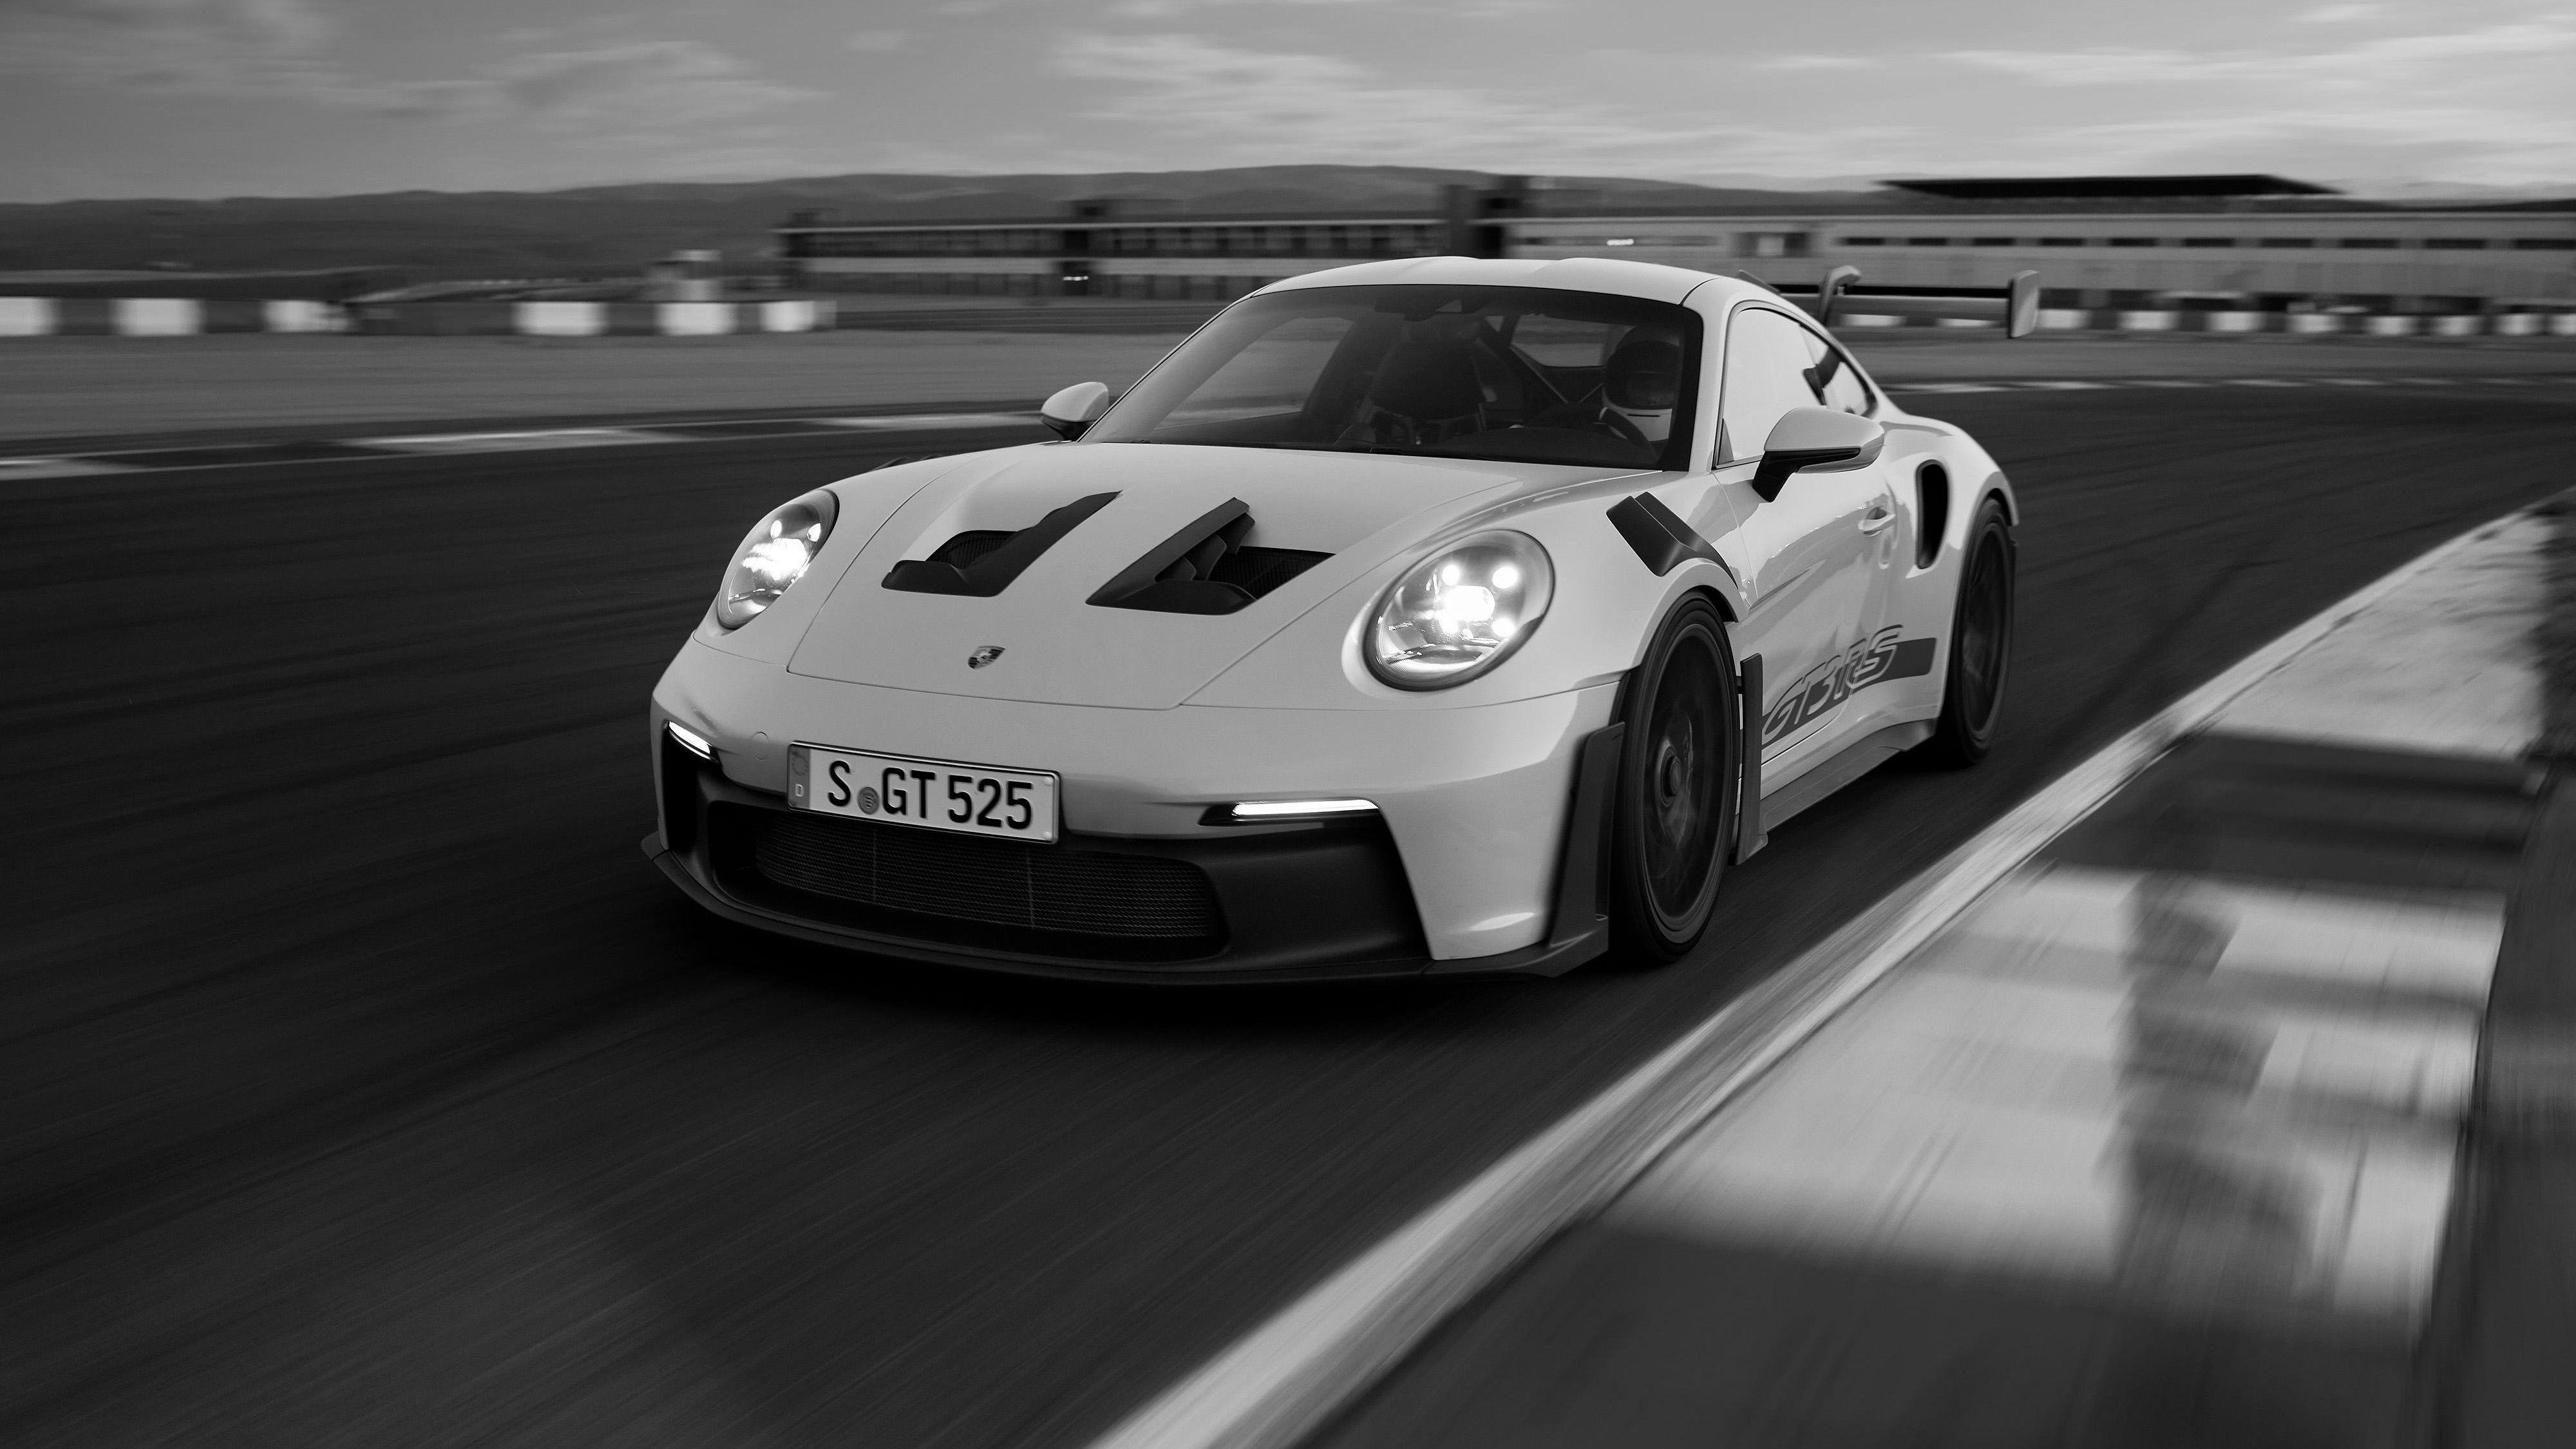

# Ahora haciendo uso de open cv

In [5]:
import cv2
image = cv2.imread("porsche992.jpg")
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("porsche992-grisCV.jpg",imageGray)


True

Resultando en lo siguiente con openCV.
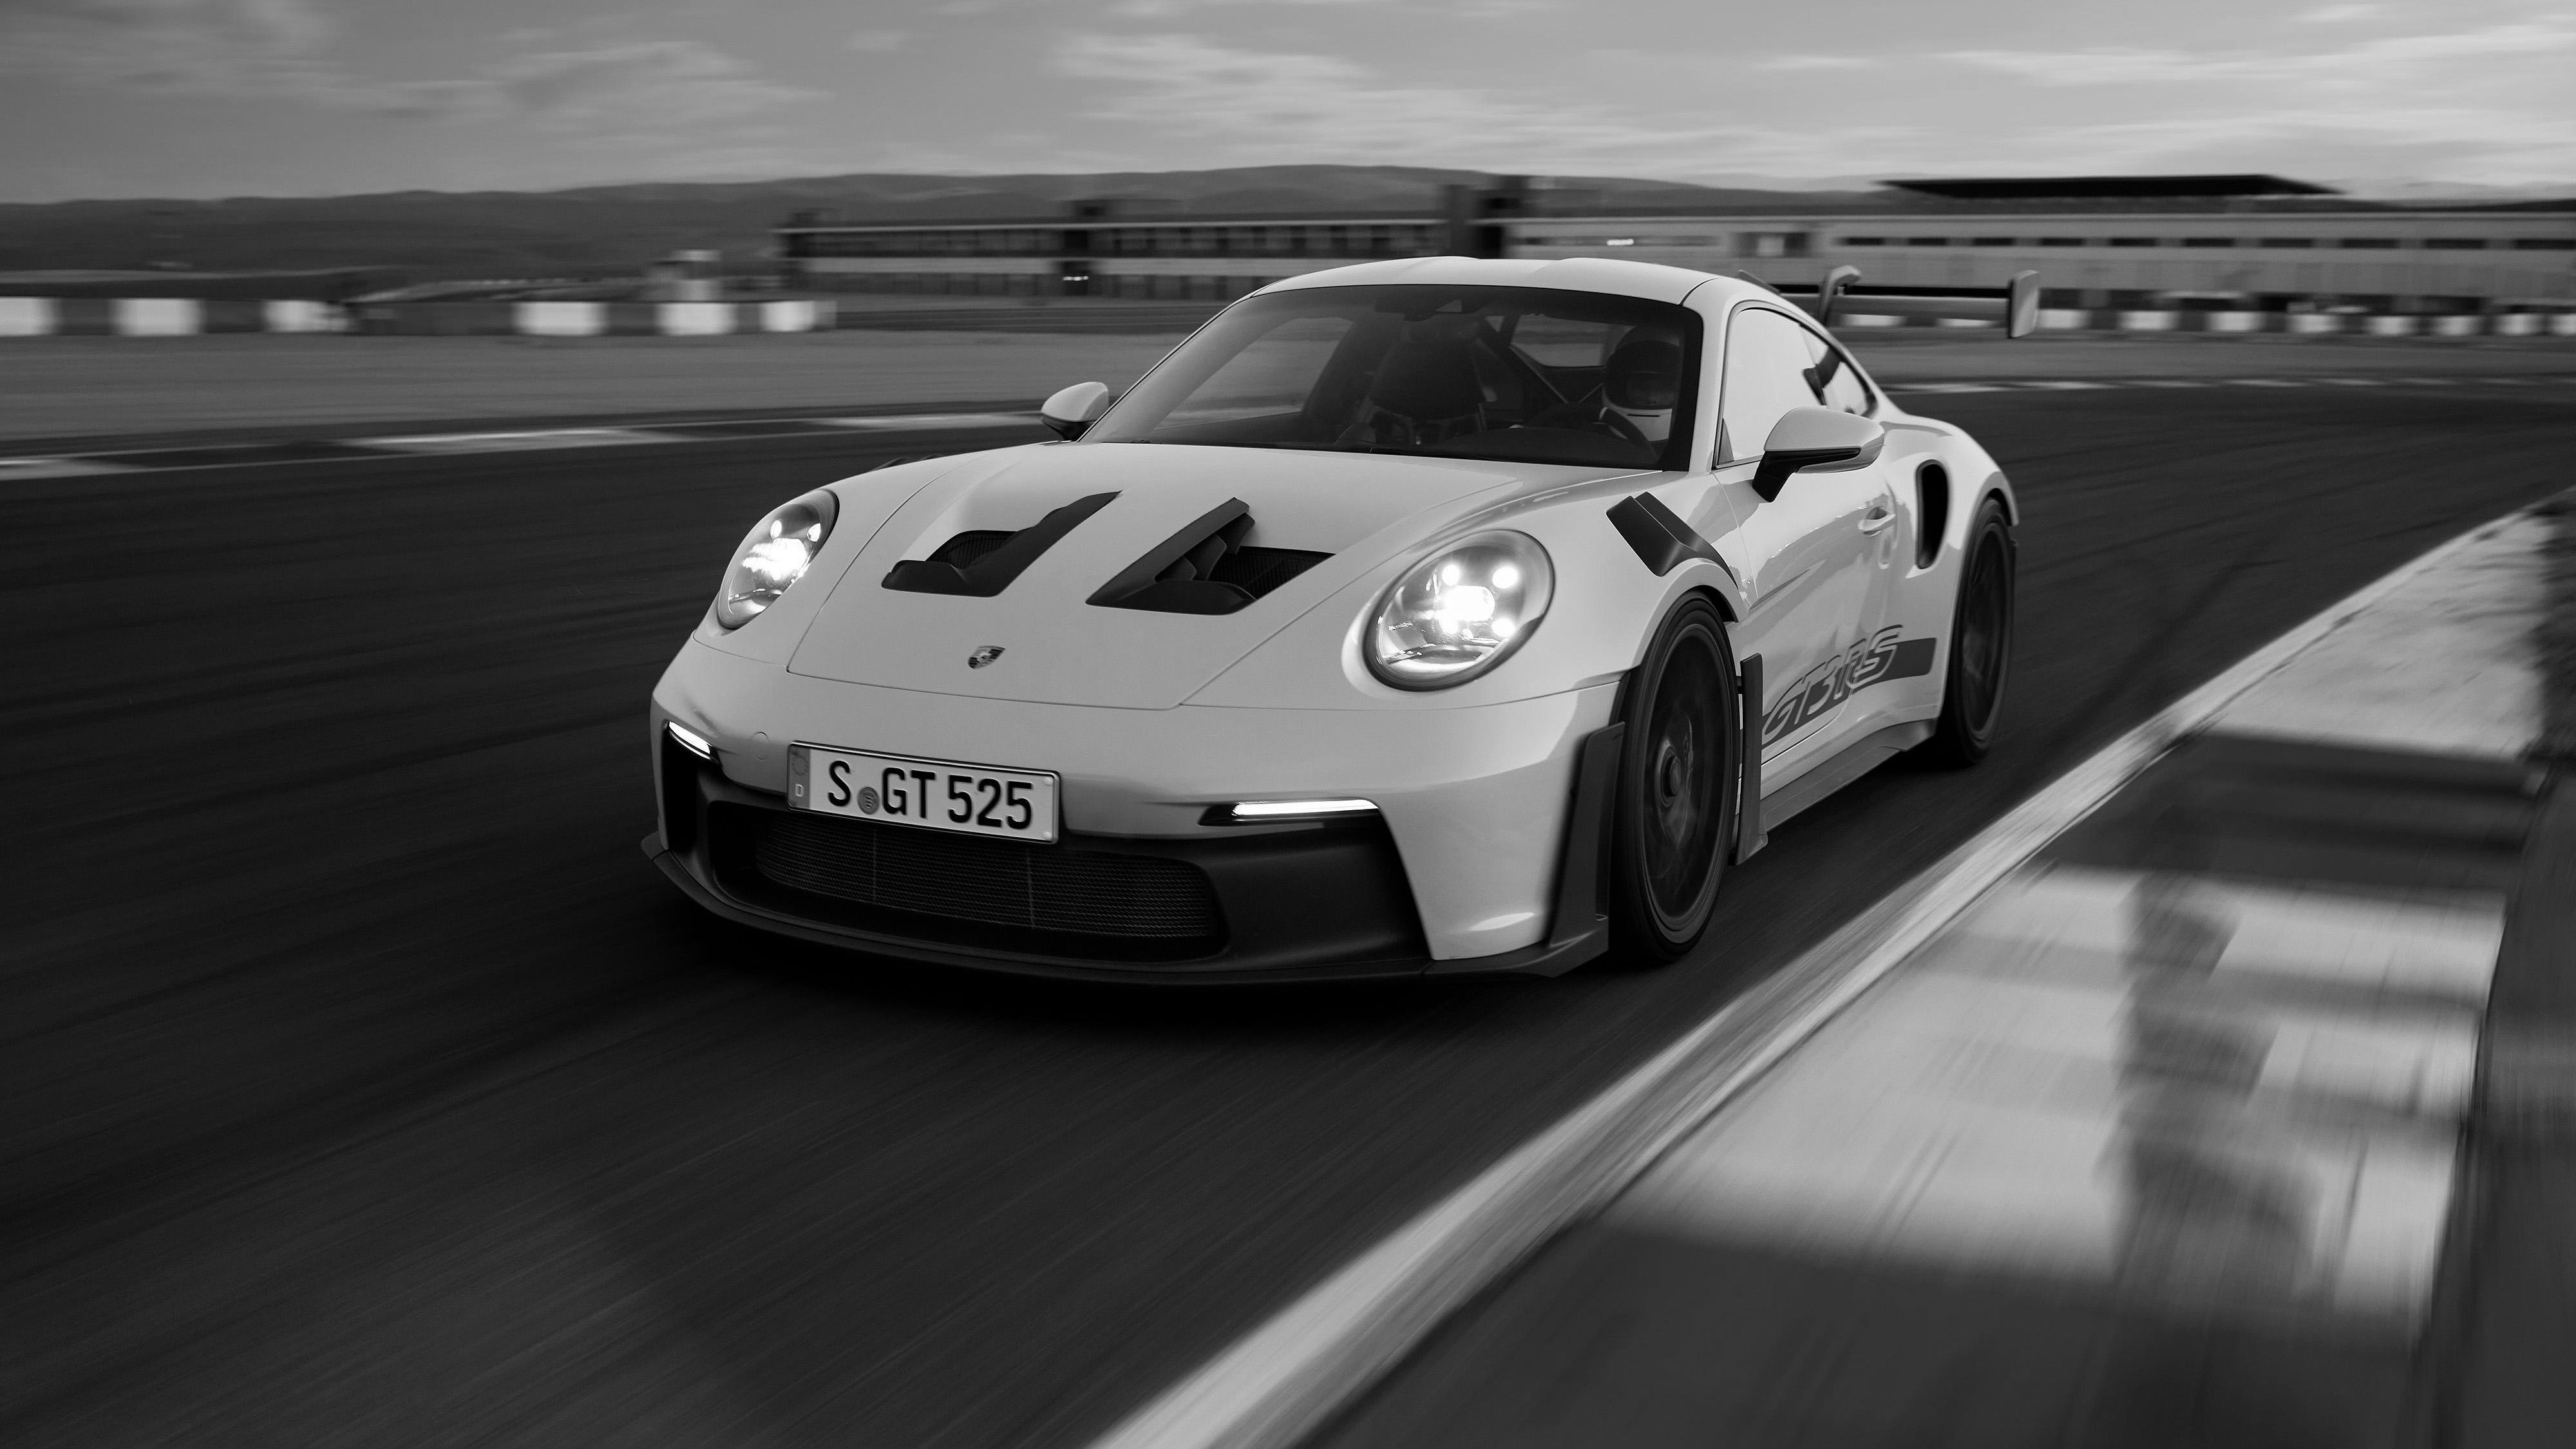

La función cv2.cvtColor() la utilizamos para conver la umagen del espacio de color BGR a escala de grises y depues se guarda en imageGray.
imread regresa la matris de colores BGR de cada pixel.

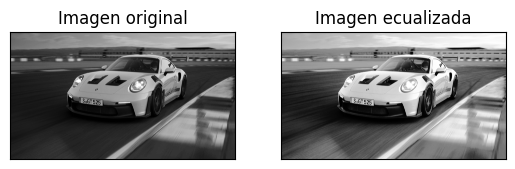

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("porsche992.jpg")
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

histograma = cv2.calcHist([imageGray],[0],None,[256],[0,256])

image_Ecualized = cv2.equalizeHist(imageGray)

plt.subplot(121), plt.imshow(imageGray, cmap="gray")
plt.title("Imagen original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_Ecualized, cmap="gray")
plt.title("Imagen ecualizada"), plt.xticks([]), plt.yticks([])
plt.show()

La biblioteca matplotlib es usada para mostrar las imágenes. La función plt.imshow() muestra la imagen en un subplot. La función plt.title() estable el titutlo y por ultimo plt.xticks() y plt.yticks() eliminan las marcas de las etiquetas que estan en los ejes. 

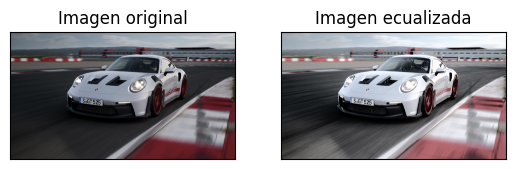

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("porsche992.jpg")
imageYcrYcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

canalY, canalCr, canalCb = cv2.split(imageYcrYcb)

canalYecualized = cv2.equalizeHist(canalY)

imageYcrYcbEcualized = cv2.merge([canalYecualized, canalCr, canalCb])

image_Ecualized = cv2.cvtColor(imageYcrYcbEcualized, cv2.COLOR_YCrCb2BGR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_Ecualized_rgb = cv2.cvtColor(image_Ecualized, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(image_rgb)
plt.title("Imagen original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_Ecualized_rgb)
plt.title("Imagen ecualizada"), plt.xticks([]), plt.yticks([])
plt.show()



La función __cv2.cvtCOlor()__ convierte la imagen del espacio de color BGR al espacio de color YCrCb, que se utiliza para la ecualización del histograma para separar en informacion de calanes (cb y cr) que posteriormente se guarda cuando la función cv2.split() separa la imagen en 3 canales que es (Y, Cr, Cb).
La función cv2.equalizeHist() equaliza el histograma del canal Y. Esto mejora el contraste de la imagen sin afectar a la infromación del color.
La función cv2.merge() combina los canales Y,Cr y Cb en una sola imagen. 
Las iamgenes se convierten a RGB antes de mostrarlas con plt.imshow(), ya matplotlib utiliza el orden de canales RGB por defecto. 